In [1]:
# Импорт необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\KIT\AppData\Local\Temp\ipykernel_12588\3632437423.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Шаг 1: Загрузка датасета
df = pd.read_csv('data\\train.csv')  

In [3]:
# Шаг 2: Предварительная обработка данных
# a. Определение и обработка отсутствующих значений
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

In [4]:
# Замена отсутствующих значений
for column in missing_values.index:
    if missing_values[column] > len(df) * 0.5:  # Если отсутствует более 50% данных
        if df[column].dtype == 'object':
            df[column] = df[column].fillna('None')  # Для категориальных переменных
        else:
            df[column] = df[column].fillna(0)  # Для числовых переменных
    elif df[column].dtype == 'object':  # Для остальных категориальных переменных
        df[column] = df[column].fillna(df[column].mode()[0])
    else:  # Для числовых переменных
        df[column] = df[column].fillna(df[column].median())

In [5]:
# b. Проверка и обработка дублирующихся строк
duplicates = df.duplicated().sum()
if duplicates > 0:
    df = df.drop_duplicates()

In [6]:
# c. Преобразование типов данных
# Преобразование категориальных переменных в числовые признаки с помощью one-hot encoding
df = pd.get_dummies(df, drop_first=True)

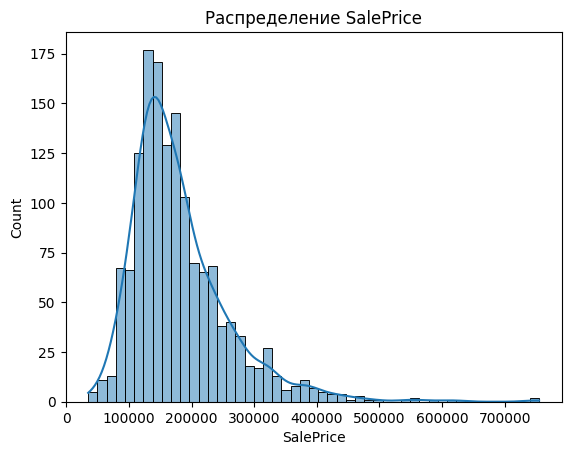

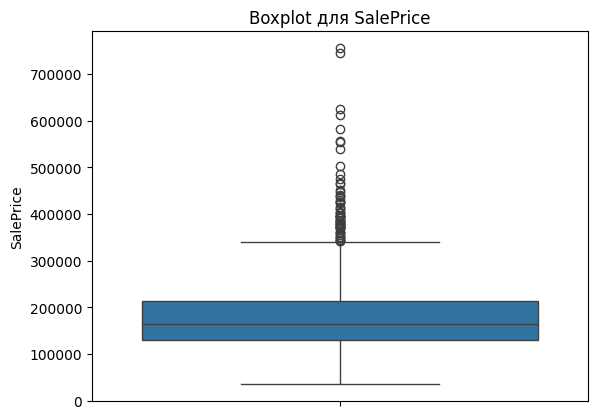

In [7]:
# Шаг 3: Разведочный анализ данных (EDA)
# a. Распределение целевой переменной 'SalePrice'
sns.histplot(df['SalePrice'], kde=True)
plt.title('Распределение SalePrice')
plt.show()

sns.boxplot(df['SalePrice'])
plt.title('Boxplot для SalePrice')
plt.show()

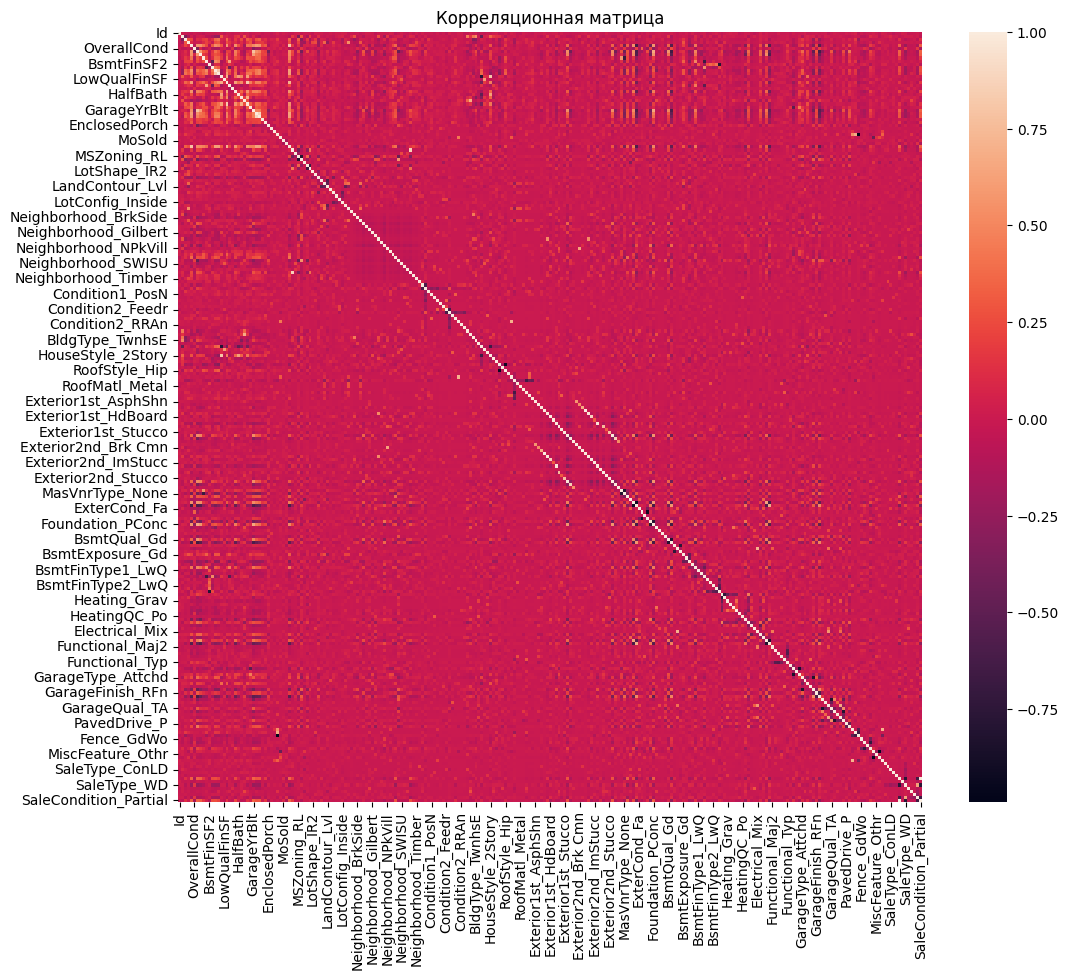

In [8]:
# b. Взаимосвязи между целевой переменной и другими характеристиками
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

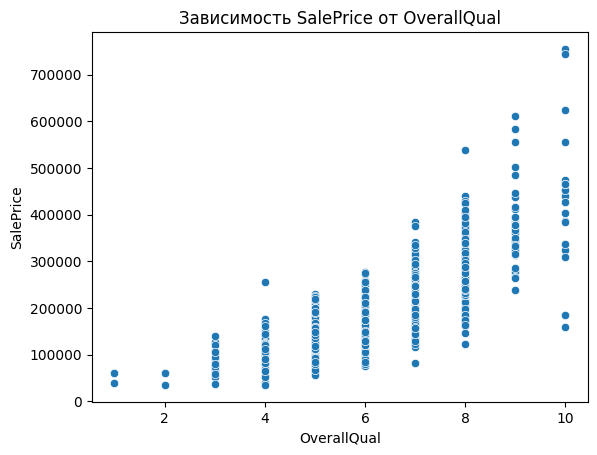

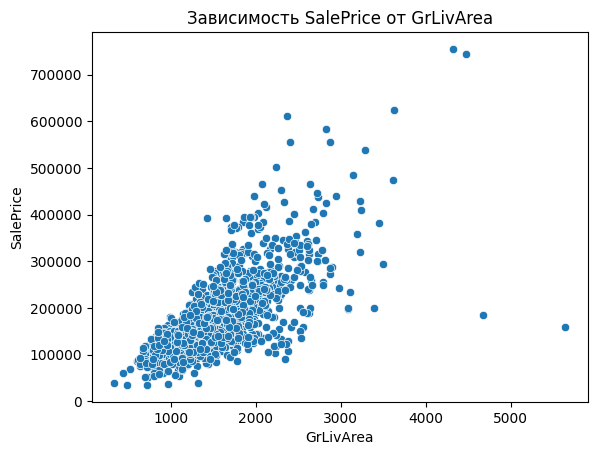

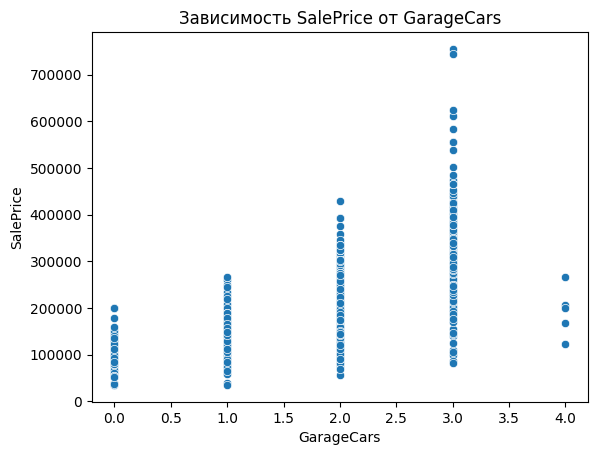

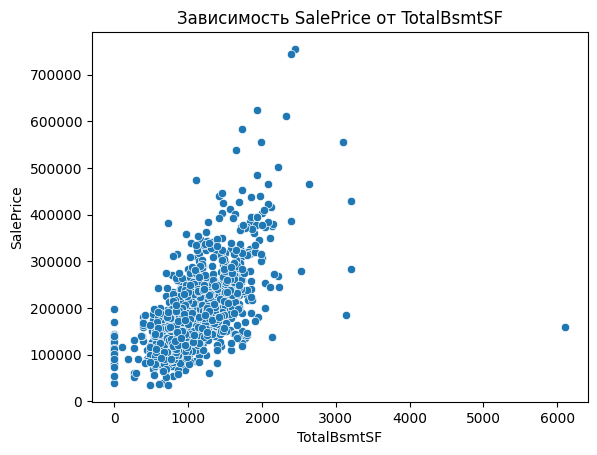

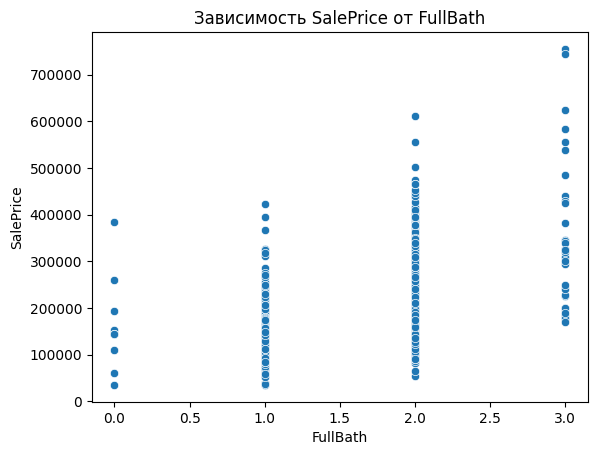

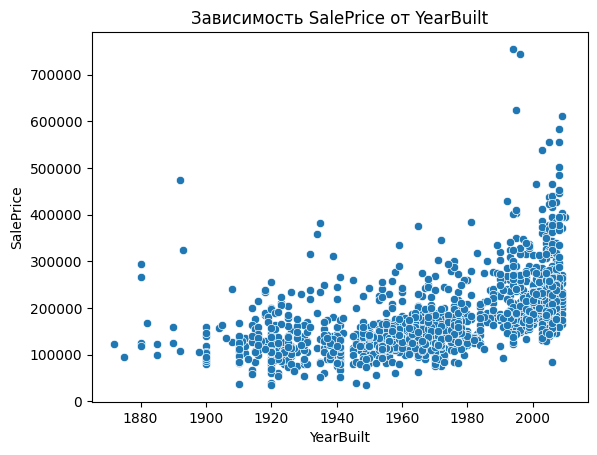

In [9]:
# c. Анализ конкретных характеристик
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
for feature in features:
    sns.scatterplot(x=feature, y='SalePrice', data=df)
    plt.title(f'Зависимость SalePrice от {feature}')
    plt.show()

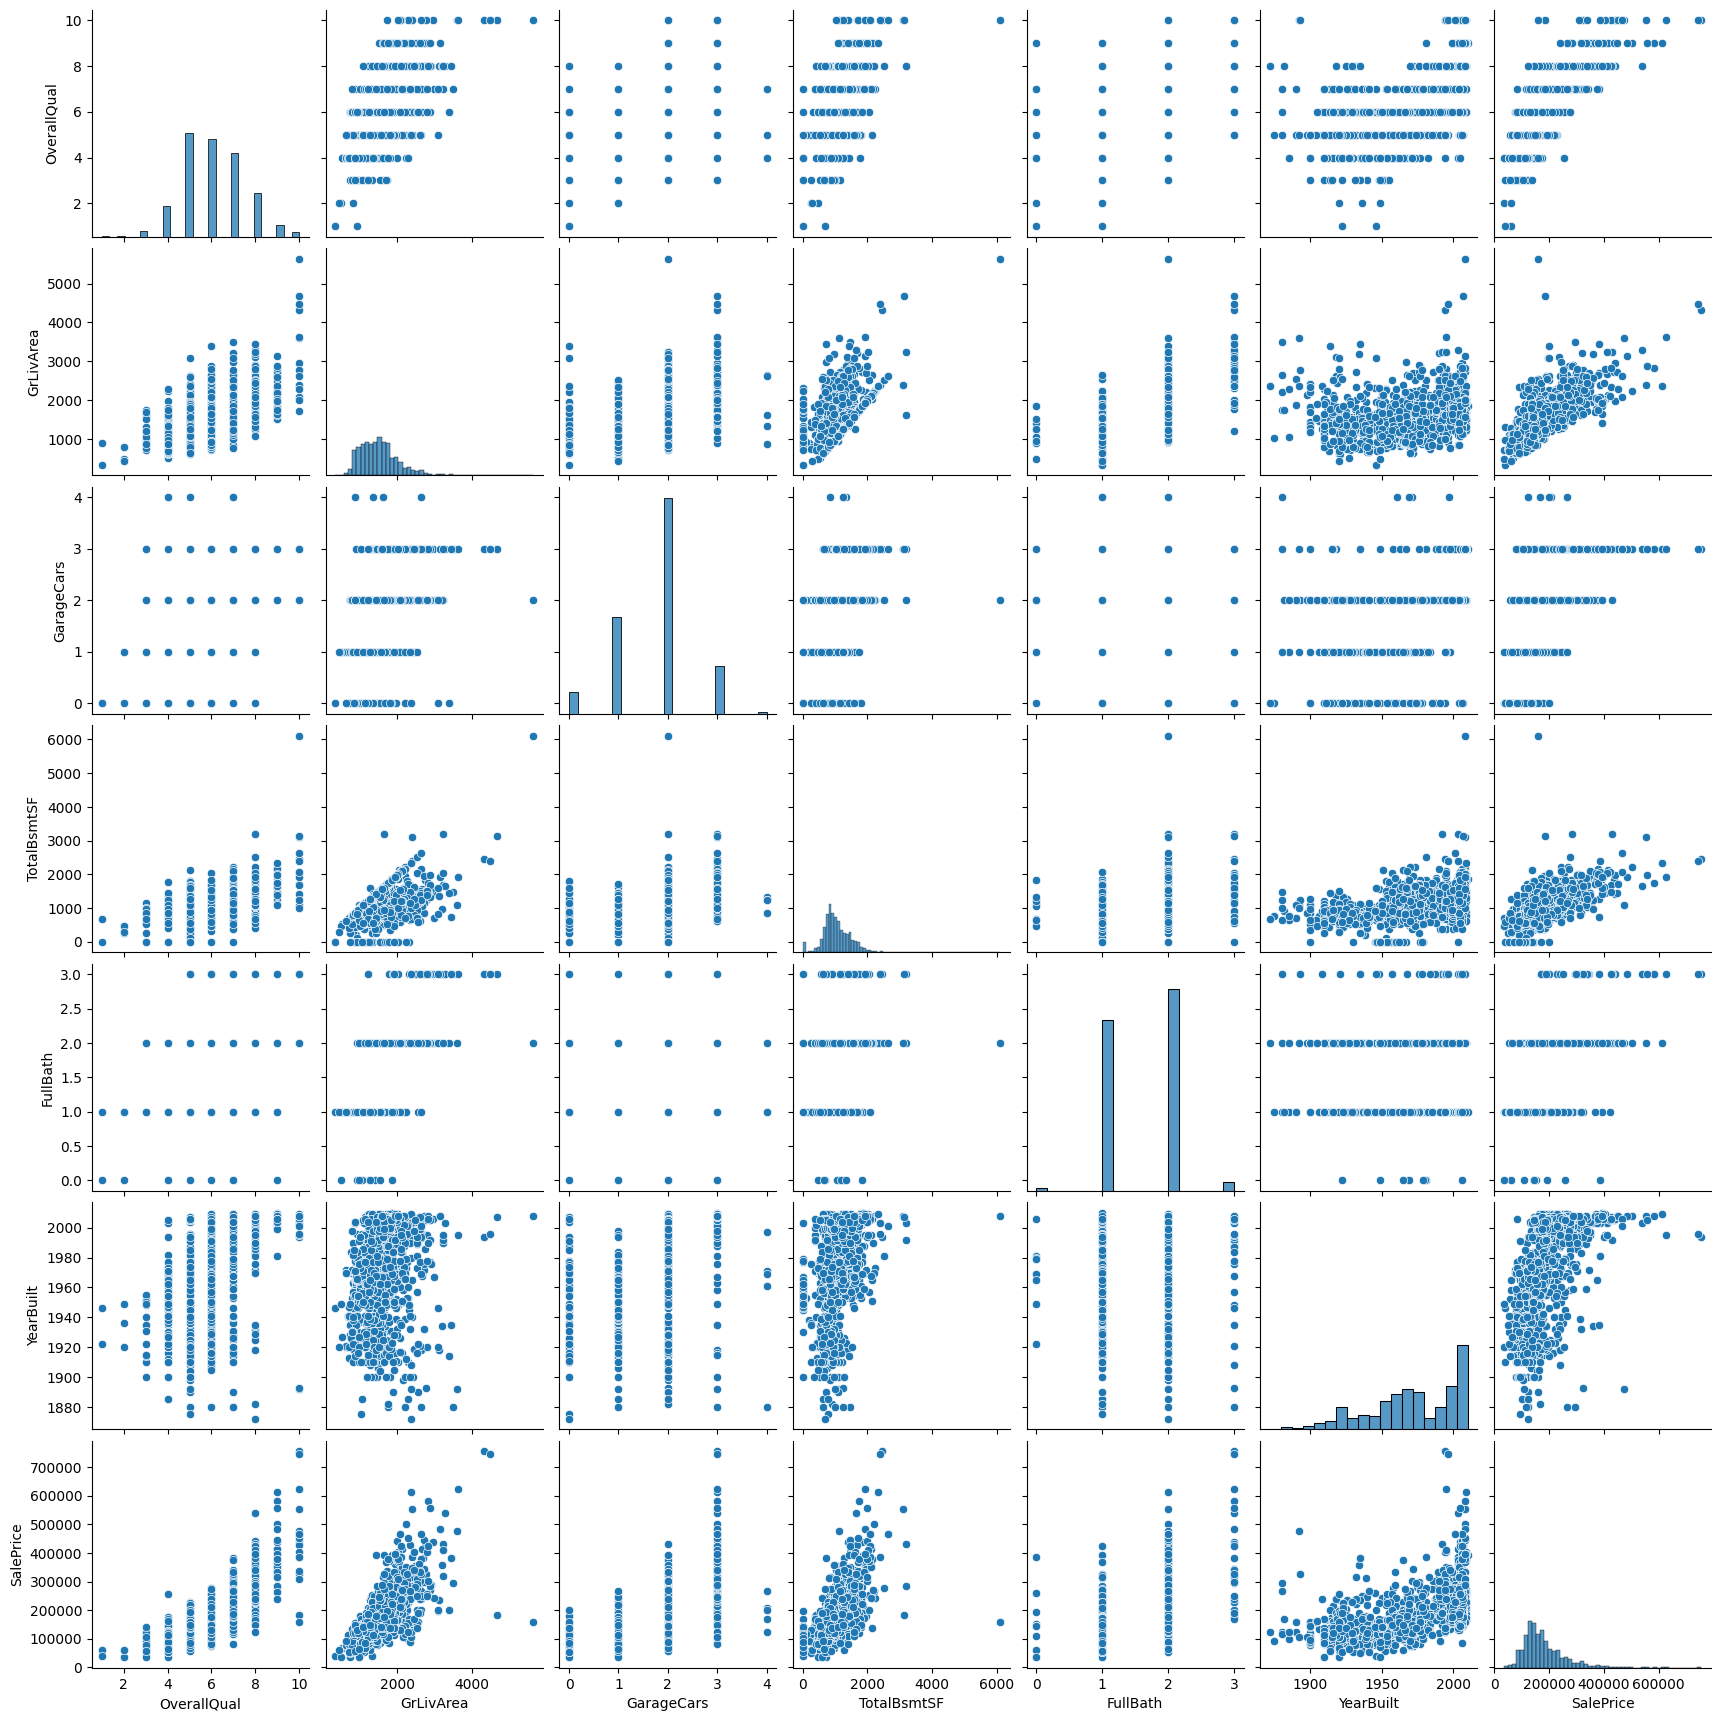

In [10]:
# d. Визуализация данных
sns.pairplot(df[features + ['SalePrice']])
plt.show()

In [11]:
# Шаг 4: Проектирование признаков
# Создание новых характеристик
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['TotalBathrooms'] = df['FullBath'] + 0.5 * df['HalfBath'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

In [12]:
# Шаг 5: Сохранение очищенного и преобразованного набора данных
df.to_csv('cleaned_house_prices.csv', index=False)